# Machine Learning 2 Assignment 2
***by Péter Szilvási***

## Loading libraries

In [1]:
# import libraries
import pandas
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

prng = np.random.RandomState(20240326)


## Loading & Examples of the Data

In [2]:
# Load in dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Look at the dimensions
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [3]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

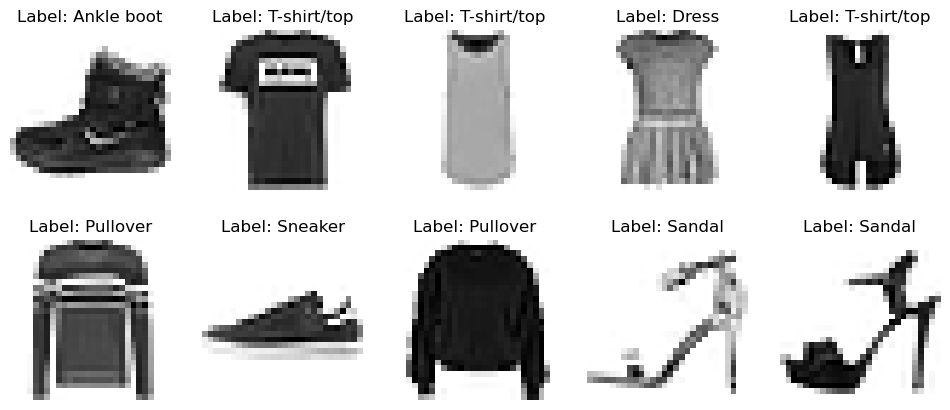

In [4]:
# Visualize some items in a grid

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

fig, axs = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_train[i], cmap="binary")
    ax.axis("off")
    ax.set_title(f"Label: {class_names[y_train[i]]}") 
plt.tight_layout
plt.show()

**What would be an appropriate metric to evaluate your models? Why?**

One appropriate metric to evaliate my models for this task would be accuracy. It measures the proportion of correct classifications out of the total instances. It's easy to interpret, it simply represents the percentage of correct predictions. 

**Train a simple fully connected single hidden layer network to predict the items.
Remember to normalize the data similar to what we did in class. Make sure that you use
enough epochs so that the validation error begins to level off - provide a plot of the training
history.**

In [5]:
# intentionally choose a small train set to decrease computational burden
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=prng)


print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_val:  {X_val.shape}")
print(f"y_val:  {y_val.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (42000, 28, 28)
y_train: (42000,)
X_val:  (18000, 28, 28)
y_val:  (18000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [6]:
import keras
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Input, Flatten, Rescaling, Dense

In [7]:
print(f"Dimension of y before transformation: {y_train.shape}")
# Convert target variables to categorical
num_classes = 10
y_sets = [y_train, y_test, y_val]
y_train, y_test, y_val = [to_categorical(y, num_classes=num_classes) for y in y_sets]
print(f"Dimension of y after transformation: {y_train.shape}")

Dimension of y before transformation: (42000,)
Dimension of y after transformation: (42000, 10)


In [8]:
# Build the model
model = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(100, activation='relu'),
    Dense(num_classes, activation='softmax')
])

print(model.summary())

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
# Fit the model
keras.utils.set_random_seed(20240326)  # for reproducibility
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=512)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6339 - loss: 1.1078 - val_accuracy: 0.8171 - val_loss: 0.5427
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8178 - loss: 0.5337 - val_accuracy: 0.8366 - val_loss: 0.4777
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 0.4748 - val_accuracy: 0.8458 - val_loss: 0.4460
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8486 - loss: 0.4426 - val_accuracy: 0.8507 - val_loss: 0.4250
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8574 - loss: 0.4200 - val_accuracy: 0.8557 - val_loss: 0.4109
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.4031 - val_accuracy: 0.8599 - val_loss: 0.3985
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3889 - val_accuracy: 0.8614 - val_loss: 0.3902
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3773 - val_accuracy: 0.8649 - val_loss:

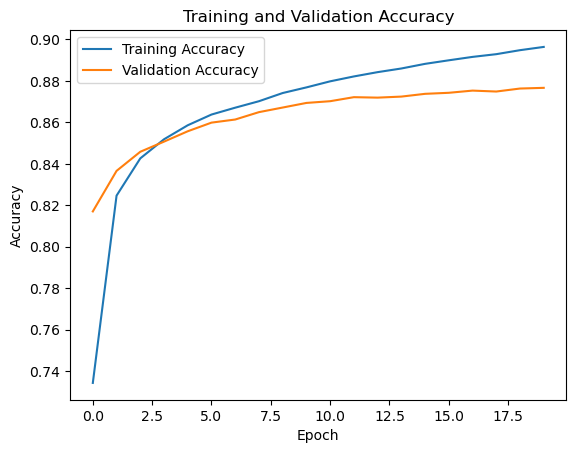

In [10]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
scores = model.evaluate(X_val, y_val)
print(f"Accuracy for Simple Model: {round(scores[1], 4)}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8756 - loss: 0.3362
Accuracy for Simple Model: 0.8767


***Experiment with different network architectures and settings (number of hidden
layers, number of nodes, regularization, etc.). 
Train at least 3 models. Explain what you have tried and how it worked.***

Model 1: Increase the number of nodes, add second layer with 100 nodes

In [12]:
model1 = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(256, activation='relu'), 
    Dense(100, activation='relu'),    
    Dense(num_classes, activation='softmax')
])
print(model1.summary())


# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,670 (889.34 KB)

 Trainable params: 227,670 (889.34 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20,batch_size = 512)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6461 - loss: 1.0330 - val_accuracy: 0.8299 - val_loss: 0.4880
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8346 - loss: 0.4774 - val_accuracy: 0.8537 - val_loss: 0.4175
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8537 - loss: 0.4190 - val_accuracy: 0.8578 - val_loss: 0.3978
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8651 - loss: 0.3834 - val_accuracy: 0.8598 - val_loss: 0.3851
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8718 - loss: 0.3606 - val_accuracy: 0.8666 - val_loss: 0.3669
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8786 - loss: 0.3390 - val_accuracy: 0.8709 - val_loss: 0.3561
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8841 - loss: 0.3214 - val_accuracy: 0.8737 - val_loss: 0.3506
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8888 - loss: 0.3068 - val_accuracy: 0.8741 - val_loss:

In [14]:
scores1 = model1.evaluate(X_val, y_val)
print(f"Accuracy for Model 2: {round(scores1[1], 4)}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8797 - loss: 0.3368
Accuracy for Model 2: 0.8787


 Even though increasing the nodes allows the model to capture the relationships better between images and labels, as well as adding a hidden layer increases the capacity to learn patterns, these didn't help increasing our validation accuracy.

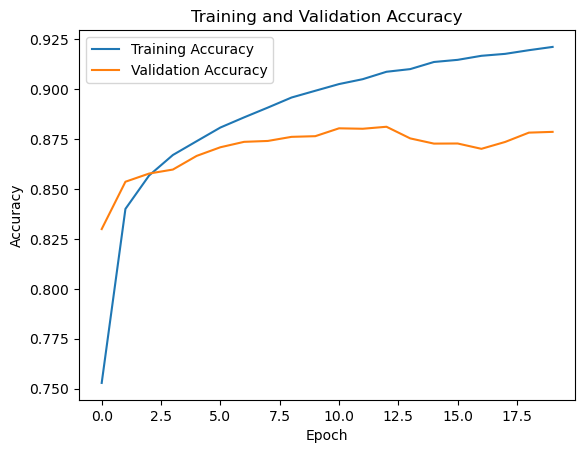

In [15]:
plt.plot(history1.history['accuracy'], label = 'Training Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 2: Introduce regularization to avoid overfitting

In [16]:
## Add regularization to the model
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

model2 = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(256, activation='relu'), 
    Dense(100, activation='relu'),
    Dropout(0.5),    
    Dense(num_classes, activation='softmax')
])
print(model2.summary())


# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,670 (889.34 KB)

 Trainable params: 227,670 (889.34 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
history2 = model2.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=512,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)] # 5 epochs without any improvement
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5771 - loss: 1.2464 - val_accuracy: 0.8168 - val_loss: 0.5231
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7989 - loss: 0.5914 - val_accuracy: 0.8503 - val_loss: 0.4203
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8314 - loss: 0.4934 - val_accuracy: 0.8549 - val_loss: 0.4026
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8428 - loss: 0.4581 - val_accuracy: 0.8594 - val_loss: 0.3823
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8555 - loss: 0.4196 - val_accuracy: 0.8595 - val_loss: 0.3754
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8557 - loss: 0.4037 - val_accuracy: 0.8668 - val_loss: 0.3608
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8650 - loss: 0.3833 - val_accuracy: 0.8746 - val_loss: 0.3428
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8730 - loss: 0.3638 - val_accuracy: 0.8751 - val_loss:

In [18]:
scores2 = model2.evaluate(X_val, y_val)
print(f"Accuracy for Model 2: {round(scores2[1], 4)}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8860 - loss: 0.3137
Accuracy for Model 2: 0.885


Adding regularization with dropout and early stopping helped our model to improve on validation accuracy. Dropout helps mitigate overfitting by randomly dropping a fraction of the neurons in the network during training. This prevents the network from becoming too reliant on one subset of neurons and this helps generalization.

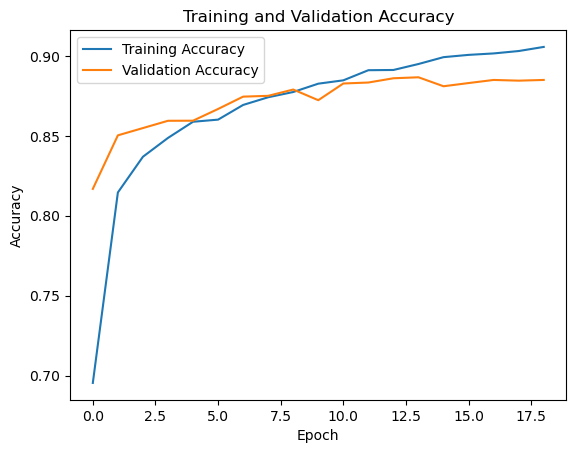

In [19]:
plt.plot(history2.history['accuracy'], label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 3: Give 1 more layer and introduce more regularization

In [20]:
# try out more layers with regularization
model3 = Sequential([
    Input(shape=X_train.shape[1:]), 
    Flatten(), 
    Rescaling(1./255), 
    Dense(256, activation='relu'),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),    
    Dense(num_classes, activation='softmax')
])
print(model3.summary())


# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,220 (907.11 KB)

 Trainable params: 232,220 (907.11 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
history3 = model3.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=512,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)])

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5402 - loss: 1.3347 - val_accuracy: 0.8187 - val_loss: 0.5189
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7916 - loss: 0.5983 - val_accuracy: 0.8365 - val_loss: 0.4528
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8264 - loss: 0.5006 - val_accuracy: 0.8511 - val_loss: 0.4107
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8424 - loss: 0.4489 - val_accuracy: 0.8654 - val_loss: 0.3721
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8556 - loss: 0.4100 - val_accuracy: 0.8639 - val_loss: 0.3762
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8622 - loss: 0.3931 - val_accuracy: 0.8723 - val_loss: 0.3553
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8699 - loss: 0.3707 - val_accuracy: 0.8762 - val_loss: 0.3494
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8747 - loss: 0.3534 - val_accuracy: 0.8768 - val_loss

In [22]:
scores3 = model3.evaluate(X_val, y_val)
print(f"Accuracy for Model 2: {round(scores3[1], 4)}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8972 - loss: 0.3462
Accuracy for Model 2: 0.8967


Even if only a bit, but we managed to improve our previous model by adding 1 more layer with dropout. We also achieved 90% accuracy without convolution, so i would consider this a good model already.

***Try to improve the accuracy of your model by using convolution. Train at least
two different models (you can vary the number of convolutional and pooling layers or whether
you include a fully connected layer before the output, etc.)***

In [23]:
from keras.layers import Reshape

preprocess = Sequential([
    Reshape(target_shape=(X_train.shape[1], X_train.shape[2], 1)),  # explicitly state the 4th (channel) dimension
    Rescaling(1./255)
])

X_sets = [X_train, X_test, X_val]
X_train_4D, X_test_4D, X_val_4D = [preprocess(X) for X in X_sets]

Convolution Model 1: Introduce Convolution.

In [24]:
from keras.layers import Conv2D, MaxPooling2D
# first convolutional model uses two convolutional layers and two max pooling layers between them.
# Build the model
model_cnn_1 = Sequential([
    Input(shape=X_train_4D.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_cnn_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_cnn_1.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
# Fit the first convolutional model
history_cnn_1 = model_cnn_1.fit(
    X_train_4D, y_train, validation_data=(X_val_4D, y_val), epochs=50, batch_size=512,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)]
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5205 - loss: 1.4950 - val_accuracy: 0.7791 - val_loss: 0.5978
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7743 - loss: 0.6044 - val_accuracy: 0.8258 - val_loss: 0.4826
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8166 - loss: 0.5118 - val_accuracy: 0.8401 - val_loss: 0.4460
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8303 - loss: 0.4739 - val_accuracy: 0.8514 - val_loss: 0.4181
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8418 - loss: 0.4452 - val_accuracy: 0.8551 - val_loss: 0.4055
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8482 - loss: 0.4268 - val_accuracy: 0.8634 - val_loss: 0.3856
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8573 - loss: 0.4069 - val_accuracy: 0.8691 - val_loss: 0.3686
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8623 - loss: 0.3913 - val_accuracy: 0.8738 - v

In [26]:
# Evaluation of the model on the validation set
scores_cnn_1 = model_cnn_1.evaluate(X_val_4D, y_val)
print(f"Accuracy for keras simple convolution model: {round(scores_cnn_1[1], 4)}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9168 - loss: 0.2362
Accuracy for keras simple convolution model: 0.9139


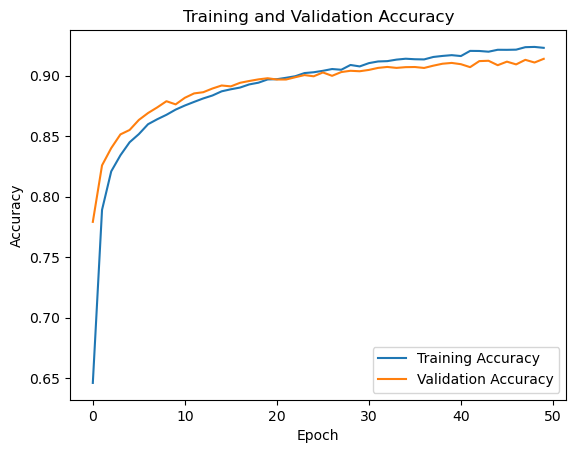

In [27]:
plt.plot(history_cnn_1.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_cnn_1.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Convolution already performs much better than the models we built before. 

Convolution Model 2: Add a layer with droput.

In [28]:
# Try to improve, add more layer with dropout as well as another layer of convolution
model_cnn_2 = Sequential([
    Input(shape=X_train_4D.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_cnn_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_cnn_2.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,242 (1.65 MB)

 Trainable params: 431,242 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

None


In [29]:
# Fit the model
history_cnn_2 = model_cnn_2.fit(
    X_train_4D, y_train, validation_data=(X_val_4D, y_val), epochs=50, batch_size=512,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)]
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5711 - loss: 1.2585 - val_accuracy: 0.8136 - val_loss: 0.5123
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8030 - loss: 0.5429 - val_accuracy: 0.8411 - val_loss: 0.4366
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8313 - loss: 0.4642 - val_accuracy: 0.8625 - val_loss: 0.3772
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8502 - loss: 0.4188 - val_accuracy: 0.8708 - val_loss: 0.3531
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8611 - loss: 0.3839 - val_accuracy: 0.8783 - val_loss: 0.3313
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8667 - loss: 0.3618 - val_accuracy: 0.8853 - val_loss: 0.3141
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8757 - loss: 0.3406 - val_accuracy: 0.8908 - val_loss: 0.3000
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.8813 - loss: 0.3233 - val_accuracy: 0.8912 - v

In [30]:
scores_cnn_2 = model_cnn_2.evaluate(X_val_4D, y_val)
print(f"Accuracy for keras  two layer convolution model: {round(scores_cnn_2[1], 4)}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9244 - loss: 0.2279
Accuracy for keras  two layer convolution model: 0.9218


Adding another layer after the convolutions with dropout seems to have achieved us the best model so far

***Select a final model and evaluate it on the test set. How does the test error compare
to the validation error?***

In [31]:
# Evaluation of the model on the test set
scores_cnn_2_test = model_cnn_2.evaluate(X_test_4D, y_test)
print(f"Accuracy for keras convolution two layer model on test data: {round(scores_cnn_2_test[1], 4)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.2738
Accuracy for keras convolution two layer model on test data: 0.9154


 the test accuracy is slightly lower than the validation accuracy. This slight drop in accuracy between the validation and test sets is what I expected since it's brand new never before seen data. The test set is unseen data that the model hasn't been trained on or validated against, this is why this provides a more unbiased estimate of the model's performance.

**Try to use a pre-trained network to improve accuracy**

In [40]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Reshape

from keras.applications.resnet50 import ResNet50
size_ResNet = (32, 32)
pretrained_model = ResNet50(weights='imagenet')

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Split the training set into training and validation sets
# Reduce training set size to decrease computational burden
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.8, random_state=prng)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Reshape images to have a single channel (grayscale) for compatibility with ResNet50
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Resize images to 32x32 and convert to 3 channels (RGB)
X_train_resized = np.array([img_to_array(array_to_img(img).resize((32, 32)).convert('RGB')) for img in X_train])
X_val_resized = np.array([img_to_array(array_to_img(img).resize((32, 32)).convert('RGB')) for img in X_val])
X_test_resized = np.array([img_to_array(array_to_img(img).convert('RGB')) for img in X_test])

# Preprocess images for ResNet50
X_train_resized = preprocess_input(X_train_resized)
X_val_resized = preprocess_input(X_val_resized)

# Leave y_train and y_val unchanged as they represent the class labels

# Define the preprocessing pipeline
preprocess = Sequential([
    Rescaling(1./255),  # Scale pixel values to the range [0, 1]
])

# Preprocess images for ResNet50
X_test_resized = preprocess(X_test_resized)

# Preprocess the input images
X_train_4D = preprocess(X_train_resized)
X_val_4D = preprocess(X_val_resized)
X_test_4D = preprocess(X_test_resized)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense

# Load pre-trained ResNet50 model without the top layers as we do not want to classify for 1000 classes but only simple binary
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=size_ResNet + (3,))  # concatenating tuples

# Freeze the layers of the pre-trained model
base_model.trainable = False


fine_tuned_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")  # Adjust units to match the number of classes (10 for Fashion MNIST)
])

# Compile the model
fine_tuned_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the fine-tuned model
pre_trained_model = fine_tuned_model.fit(X_train_4D, y_train, validation_data=(X_val_4D, y_val), epochs=20, batch_size=512,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)]
)

# Evaluate the model
loss, accuracy = fine_tuned_model.evaluate(X_test_4D, y_test)
print('Test accuracy:', round(accuracy, 4))

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.2174 - loss: 2.2781 - val_accuracy: 0.5168 - val_loss: 1.5123
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5452 - loss: 1.4084 - val_accuracy: 0.6224 - val_loss: 1.2117
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6246 - loss: 1.1707 - val_accuracy: 0.6652 - val_loss: 1.0700
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6587 - loss: 1.0459 - val_accuracy: 0.6899 - val_loss: 0.9823
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6796 - loss: 0.9656 - val_accuracy: 0.7029 - val_loss: 0.9206
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6946 - loss: 0.9090 - val_accuracy: 0.7121 - val_loss: 0.8757
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7071 - loss: 0.8668 - val_accuracy: 0.7184 - val_loss: 0.8425
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7128 - loss: 0.8346 - val_accuracy: 0.7227 - val_loss:

the pre-trained model doesn't seem to improve on our model, and its training is super-super slow. it's not worth the truble for this exercise